# **`Notebook Information`**
- **Name:** Mhar Andrei Consebido Macapallag
- **Y&S:** BSCS 3B IS
- **Course:** CSST 102 | Basic Machine Learning
- **Topic:** Topic 2: Supervised Learning Techniques
- **Due date:** N/A

# **`Laboratory Exercise #2: Exercises for K-Nearest Neighbors (KNN) and Logistic Regression on Breast Cancer Diagnosis Dataset`**

# **`Exercise 1: Data Exploration and Preprocessing`**

In [1]:
#@title ## **1. Load and Explore the Data:**

# Load necessary libraries
import pandas as pd

# Load the dataset, ensure flexibility in file path handling
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

# Check column names for consistency
print("Column Names:", df.columns)

# Display the first 10 rows
print("First 10 Rows:")
print(df.head(10))

# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

Column Names: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
First 10 Rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     

In [2]:
#@title ## **Task: Summarize the Dataset:**

# Number of instances and features
print(f'Number of Instances: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

# Breakdown of target variable (diagnosis)
print("Diagnosis Breakdown (M = Malignant, B = Benign):")
print(df['diagnosis'].value_counts())

# Display missing values for further action
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])


Number of Instances: 569
Number of Features: 33
Diagnosis Breakdown (M = Malignant, B = Benign):
diagnosis
B    357
M    212
Name: count, dtype: int64
Missing Values:
Unnamed: 32    569
dtype: int64


In [3]:
#@title ## **3. Preprocessing:**

from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns
if 'id' in df.columns:
    df = df.drop(columns=['id'])
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

# Convert Diagnosis column to binary (M -> 1, B -> 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for any missing values before scaling
missing_values = df.isnull().sum()
if missing_values.any():
    print("There are still missing values. Consider handling them before scaling.")
else:
    # Normalize features
    scaler = StandardScaler()
    features = df.drop(columns=['diagnosis'])
    scaled_features = scaler.fit_transform(features)


In [4]:
#@title ## **4. Train-Test Split:**

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, df['diagnosis'],
    test_size=0.2, random_state=42, stratify=df['diagnosis'])

# Print the sizes of training and testing sets
print(f'Training Set Size: {X_train.shape[0]} samples')
print(f'Testing Set Size: {X_test.shape[0]} samples')


Training Set Size: 455 samples
Testing Set Size: 114 samples


# **`Exercise 2: Implementing K-Nearest Neighbors (KNN) Model`**

In [5]:
#@title ## **1. Train the KNN Classifier:**

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the test set
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

Accuracy: 95.61%
Confusion Matrix:
[[71  1]
 [ 4 38]]
Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        72
   Malignant       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



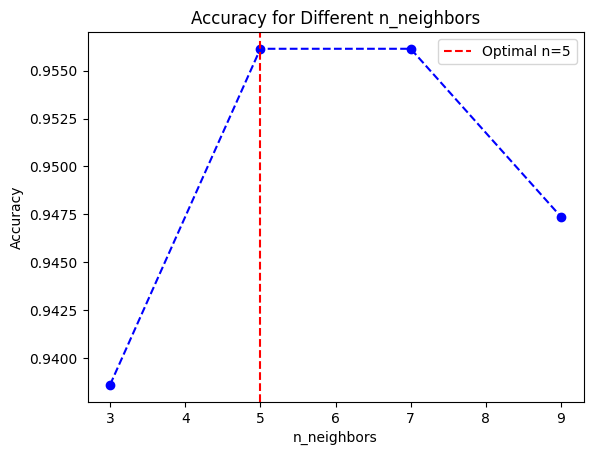

The optimal n_neighbors is 5 with an accuracy of 95.61%.


In [6]:
#@title ## **2. Experiment with Different n_neighbors:**

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define a list of different neighbor values to experiment with
neighbors = [3, 5, 7, 9]
accuracies = []

# Iterate over different n_neighbors values
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Calculate accuracy for each model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs n_neighbors
plt.plot(neighbors, accuracies, marker='o', color='blue', linestyle='--')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different n_neighbors')

# Highlight the optimal n_neighbors
optimal_n = neighbors[accuracies.index(max(accuracies))]
optimal_acc = max(accuracies)

plt.axvline(x=optimal_n, color='red', linestyle='--', label=f'Optimal n={optimal_n}')
plt.legend()
plt.show()

# Print the best n_neighbors
print(f'The optimal n_neighbors is {optimal_n} with an accuracy of {optimal_acc * 100:.2f}%.')


# **`Exercise 3: Implementing Logistic Regression`**

In [7]:
#@title ## **1. Train Logistic Regression:**

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Predict the test set
y_pred_lr = logreg.predict(X_test)

# Accuracy and classification report
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')

# Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix (Logistic Regression):')
print(conf_matrix_lr)

# Classification report
print('Classification Report (Logistic Regression):')
print(classification_report(y_test, y_pred_lr, target_names=['Benign', 'Malignant']))


Logistic Regression Accuracy: 97.37%
Confusion Matrix (Logistic Regression):
[[71  1]
 [ 2 40]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [8]:
#@title ## **2. Comparison of KNN and Logistic Regression:**

import pandas as pd

# Accuracy for KNN and Logistic Regression
accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Precision, Recall, F1-Score for both models
report_knn = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'], output_dict=True)
report_lr = classification_report(y_test, y_pred_lr, target_names=['Benign', 'Malignant'], output_dict=True)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression'],
    'Accuracy': [accuracy_knn * 100, accuracy_lr * 100],
    'Precision (Benign)': [report_knn['Benign']['precision'], report_lr['Benign']['precision']],
    'Recall (Benign)': [report_knn['Benign']['recall'], report_lr['Benign']['recall']],
    'F1-Score (Benign)': [report_knn['Benign']['f1-score'], report_lr['Benign']['f1-score']],
    'Precision (Malignant)': [report_knn['Malignant']['precision'], report_lr['Malignant']['precision']],
    'Recall (Malignant)': [report_knn['Malignant']['recall'], report_lr['Malignant']['recall']],
    'F1-Score (Malignant)': [report_knn['Malignant']['f1-score'], report_lr['Malignant']['f1-score']]
})

# Display the comparison
print(comparison_df)

# Determine which model performs better
if accuracy_knn > accuracy_lr:
    print("KNN performs better in terms of accuracy.")
elif accuracy_knn < accuracy_lr:
    print("Logistic Regression performs better in terms of accuracy.")
else:
    print("Both models have the same accuracy.")


                 Model   Accuracy  Precision (Benign)  Recall (Benign)  \
0                  KNN  94.736842            0.934211         0.986111   
1  Logistic Regression  97.368421            0.972603         0.986111   

   F1-Score (Benign)  Precision (Malignant)  Recall (Malignant)  \
0           0.959459               0.973684            0.880952   
1           0.979310               0.975610            0.952381   

   F1-Score (Malignant)  
0              0.925000  
1              0.963855  
Logistic Regression performs better in terms of accuracy.


# **`Exercise 4: Hyperparameter Tuning and Cross-Validation`**

In [9]:
#@title ## **1. GridSearchCV for KNN:**

from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for KNN
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Output the best parameters and corresponding accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score * 100:.2f}%')


Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 96.92%


In [10]:
#@title ## **2. Cross-Validation for Logistic Regression:**

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for Logistic Regression
cv_scores = cross_val_score(logreg, scaled_features, df['diagnosis'], cv=5)

# Output the mean cross-validated accuracy
mean_cv_accuracy = cv_scores.mean()

print(f'Cross-Validated Accuracy (Logistic Regression): {mean_cv_accuracy * 100:.2f}%')


Cross-Validated Accuracy (Logistic Regression): 98.07%


# **`Exercise 5: Decision Boundary Visualization`**

In [11]:
#@title ## **1. Use PCA for Dimensionality Reduction:**

from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# Train-test split after PCA
X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, df['diagnosis'], test_size=0.2, random_state=42)

# KNN with PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train_pca)

# Logistic Regression with PCA data
logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_pca_train, y_train_pca)


LogisticRegression(max_iter=10000)

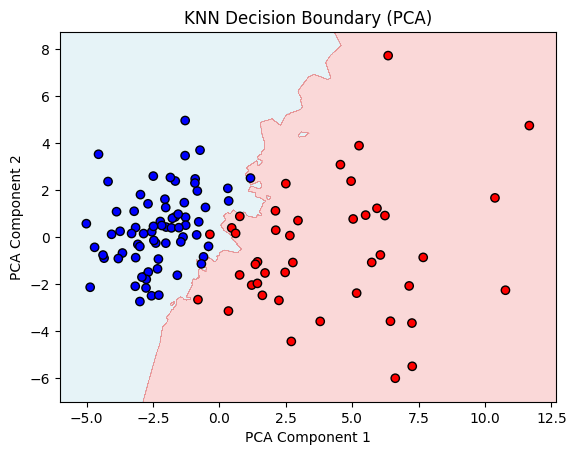

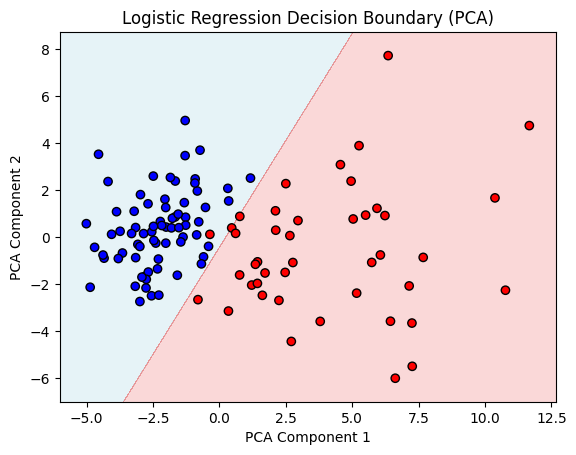

In [12]:
#@title ## **Task: Plot the Decision Boundary:**

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('lightblue', 'lightcoral')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('blue', 'red')))
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Plot decision boundaries for KNN and Logistic Regression
plot_decision_boundary(knn_pca, X_pca_test, y_test_pca, title='KNN Decision Boundary (PCA)')
plot_decision_boundary(logreg_pca, X_pca_test, y_test_pca, title='Logistic Regression Decision Boundary (PCA)')
